# Clustering analysis military dataset

In [373]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans


In [374]:
df = pd.read_excel(r"C:\Users\BalintStewart\OneDrive - Health Data Research\Desktop\magnimind-assignments\Clustering projects\World military power.xlsx")  

In [375]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987.0
1,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,...,Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691.0
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734.0
3,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369.0
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968.0


## Column cleaning

In [376]:
df.columns

Index(['Military Strength', 'Military Strength Power Index',
       'Aircraft Strength', 'Aircraft Strength value',
       'Fighter/Interceptor Strength', 'Fighter/Interceptor Strength value',
       'Attack Aircraft Strength', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength',
       'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength',
       'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength',
       'Attack Helicopter Fleet Strength value', 'Tank Strength',
       'Tank Strength value', 'AFV/APC Strength', 'AFV/APC Strength value',
       'Self-Propelled Artillery Strength',
       'Self-Propelled Artillery Strength value', 'Towed Artillery Strength',
       'Towed Artillery Strength value', 'Rocket Projector Strength',
       'Rocket Projector Strength value', 'Navy Fleet Strengths',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength',


Assign column 1 values as the index (country name), only keep columns that contain 'value' in them

In [377]:
# Assign country name as the index
df.index = df.iloc[:,0]
df = df.rename_axis('Country')

# keep only columns that contain 'Index' or 'value in them
df = df[[col for col in df.columns if 'value' in col or 'Index' in col]]
df.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,...,43,0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200,5987.0
Albania,2.3137,19,0,0,0,0,19,0,0,467,...,4,16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41,691.0
Algeria,0.4659,551,103,22,59,87,257,45,880,7361,...,157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,6734.0
Angola,0.8379,295,72,18,30,47,126,15,379,595,...,176,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300,5369.0
Argentina,0.6521,227,24,7,9,64,100,0,370,739,...,1138,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000,11968.0


## Preprocessing: clean the numeric columns


In [378]:
df.dtypes

Military Strength Power Index              float64
Aircraft Strength value                      int64
Fighter/Interceptor Strength value           int64
Attack Aircraft Strength value               int64
Transport Aircraft Fleet Strength value      int64
Trainer Aircraft Fleet value                 int64
Helicopter Fleet Strength value              int64
Attack Helicopter Fleet Strength value       int64
Tank Strength value                          int64
AFV/APC Strength value                       int64
Self-Propelled Artillery Strength value      int64
Towed Artillery Strength value               int64
Rocket Projector Strength value              int64
Navy Fleet Strengths value                 float64
Aircraft Carrier Fleet Strength value      float64
Submarine Fleet Strength value             float64
Destroyer Fleet Strength value             float64
Frigate Fleet Strength value               float64
defense spending budget value               object
External Debt value            

In [379]:
# Remove commas
df = df.replace({',':''}, regex = True)

# convert columns to numeric where possible
df = df.apply(pd.to_numeric, errors = 'ignore')

C:\Users\BalintStewart\AppData\Local\Temp\ipykernel_19104\4146616152.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors = 'ignore')


In [380]:
df.dtypes

Military Strength Power Index              float64
Aircraft Strength value                      int64
Fighter/Interceptor Strength value           int64
Attack Aircraft Strength value               int64
Transport Aircraft Fleet Strength value      int64
Trainer Aircraft Fleet value                 int64
Helicopter Fleet Strength value              int64
Attack Helicopter Fleet Strength value       int64
Tank Strength value                          int64
AFV/APC Strength value                       int64
Self-Propelled Artillery Strength value      int64
Towed Artillery Strength value               int64
Rocket Projector Strength value              int64
Navy Fleet Strengths value                 float64
Aircraft Carrier Fleet Strength value      float64
Submarine Fleet Strength value             float64
Destroyer Fleet Strength value             float64
Frigate Fleet Strength value               float64
defense spending budget value                int64
External Debt value            

In [381]:
df.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,...,43,0,5500,0,14325743,34940837,652230,0.0,1200,5987.0
Albania,2.3137,19,0,0,0,0,19,0,0,467,...,4,16000,42500,168300000,1519438,3057220,28748,362.0,41,691.0
Algeria,0.4659,551,103,22,59,87,257,45,880,7361,...,157,1306000,325000,12200000000,20741263,41657488,2381741,998.0,0,6734.0
Angola,0.8379,295,72,18,30,47,126,15,379,595,...,176,1666000,82300,8273000000,6244205,30355880,1246700,1600.0,1300,5369.0
Argentina,0.6521,227,24,7,9,64,100,0,370,739,...,1138,479400,685000,2185000000,20179430,44694198,2780400,4989.0,11000,11968.0


## Preprocessing: impute missing values

30 features is a lot for a pairplot visualisation...

In [382]:
df.shape

(138, 30)

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, Afghanistan to Zimbabwe
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength Power Index            138 non-null    float64
 1   Aircraft Strength value                  138 non-null    int64  
 2   Fighter/Interceptor Strength value       138 non-null    int64  
 3   Attack Aircraft Strength value           138 non-null    int64  
 4   Transport Aircraft Fleet Strength value  138 non-null    int64  
 5   Trainer Aircraft Fleet value             138 non-null    int64  
 6   Helicopter Fleet Strength value          138 non-null    int64  
 7   Attack Helicopter Fleet Strength value   138 non-null    int64  
 8   Tank Strength value                      138 non-null    int64  
 9   AFV/APC Strength value                   138 non-null    int64  
 10  Self-Propelled Artillery Strength value 

Data has some missing values, need to deal with these first

In [384]:
df.isna().sum()

Military Strength Power Index               0
Aircraft Strength value                     0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Tank Strength value                         0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength value     0
Towed Artillery Strength value              0
Rocket Projector Strength value             0
Navy Fleet Strengths value                 14
Aircraft Carrier Fleet Strength value      23
Submarine Fleet Strength value             23
Destroyer Fleet Strength value             23
Frigate Fleet Strength value               23
defense spending budget value               0
External Debt value                         0
Airport Totals value                        0
Oil Production value              

In [385]:
df[df['Total Coastline Coverage value'].isna()]

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
Country,,,,,,,,,,,,,,,,,,,,,
Armenia,2.1251,64,0,9,3,13,37,20,110,748,...,11,0,47500,0,1696085,3038217,29743,NaN,0,1570.0
Austria,0.9568,120,15,0,11,32,62,0,56,467,...,52,14260,215000,43000000,4017691,8793370,83871,NaN,0,2524.0
Belarus,0.8179,202,39,68,4,28,63,21,532,1560,...,65,32000,190000,198000000,4982905,9527543,207600,NaN,2500,3599.0
Bhutan,10.1681,2,0,0,0,0,2,0,0,27,...,2,0,2000,0,176808,766397,38394,NaN,0,1136.0
Bolivia,0.9942,69,0,0,14,23,38,0,54,137,...,855,59330,60000,211500000,5075416,11306341,1098581,NaN,10000,7252.0
Botswana,2.0582,45,10,0,11,8,16,0,55,245,...,74,0,16500,0,962617,2249104,581730,NaN,0,4347.0
Burkina Faso,1.9009,16,0,3,1,4,8,2,0,350,...,23,0,10500,0,7800000,19742715,274200,NaN,0,3611.0
Central African Republic,3.2889,3,0,0,2,0,1,0,4,55,...,39,0,4500,0,2348581,5745062,622984,NaN,2800,5920.0
Chad,1.6383,35,0,6,6,4,17,3,60,372,...,59,128000,100000,1500000000,6030834,15833116,1284000,NaN,0,6406.0


All NaN in 'Total Coastline Coverage value' column are landlocked countries, so impute these NaN with value of 0

In [386]:
df['Total Coastline Coverage value'] = df['Total Coastline Coverage value'].fillna(0)

In [387]:
navy_df= df[['Total Coastline Coverage value','Navy Fleet Strengths value','Submarine Fleet Strength value','Destroyer Fleet Strength value','Frigate Fleet Strength value']]
navy_df.head()

,Total Coastline Coverage value,Navy Fleet Strengths value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value
Country,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0
Albania,362.0,38.0,0.0,0.0,0.0
Algeria,998.0,201.0,6.0,0.0,5.0
Angola,1600.0,57.0,0.0,0.0,0.0
Argentina,4989.0,49.0,2.0,4.0,0.0


In [388]:
navy_df[navy_df.isna().any(axis = 1)]

,Total Coastline Coverage value,Navy Fleet Strengths value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value
Country,,,,,
Armenia,0.0,0.0,NaN,NaN,NaN
Austria,0.0,0.0,NaN,NaN,NaN
Belarus,0.0,0.0,NaN,NaN,NaN
Bhutan,0.0,0.0,NaN,NaN,NaN
Botswana,0.0,NaN,NaN,NaN,NaN
Burkina Faso,0.0,NaN,NaN,NaN,NaN
Central African Republic,0.0,NaN,NaN,NaN,NaN
Chad,0.0,NaN,NaN,NaN,NaN
Czechia,0.0,NaN,NaN,NaN,NaN


Nearly all countries (only South Korea exception) with missing navy subdivision values have navy strenght = 0. Replace these NaNs also with 0

In [389]:
df[['Navy Fleet Strengths value','Submarine Fleet Strength value','Destroyer Fleet Strength value','Frigate Fleet Strength value']] = df[['Navy Fleet Strengths value','Submarine Fleet Strength value','Destroyer Fleet Strength value','Frigate Fleet Strength value']].fillna(0)

Now look at final col containing missing values: Aircraft Carrier Fleet Strength value

array([[<Axes: title={'center': 'Aircraft Carrier Fleet Strength value'}>]],
      dtype=object)

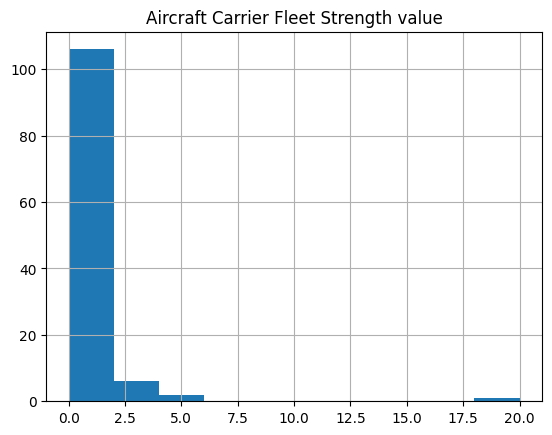

In [390]:
df.hist('Aircraft Carrier Fleet Strength value')

Most of the countries contain 0 for this column, so will also impute 0 for this column for the missing values, too

In [391]:
df['Aircraft Carrier Fleet Strength value'] = df['Aircraft Carrier Fleet Strength value'].fillna(0)

In [392]:
df.isna().sum()

Military Strength Power Index              0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
Navy Fleet Strengths value                 0
Aircraft Carrier Fleet Strength value      0
Submarine Fleet Strength value             0
Destroyer Fleet Strength value             0
Frigate Fleet Strength value               0
defense spending budget value              0
External Debt value                        0
Airport Totals value                       0
Oil Production value                       0
Oil Consum

In [393]:
df[df['Total Border Coverage value'].isna()]

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
Country,,,,,,,,,,,,,,,,,,,,,
Australia,0.3225,464,82,6,38,174,133,22,59,3051,...,480,263000,1005000,1821000000,10808002,23470145,7741220,25760.0,2000,NaN
Bahrain,1.8547,109,17,0,2,37,65,22,180,843,...,4,45000,55000,124600000,806505,1422659,760,161.0,0,NaN
Japan,0.1501,1561,279,12,60,427,637,119,1004,3130,...,175,3841,4000000,44120000,53873803,126168156,377915,29751.0,1770,NaN
Madagascar,3.0869,6,0,0,0,0,6,0,12,103,...,83,0,18500,0,10145026,25683610,587040,4828.0,600,NaN
New Zealand,1.3684,48,0,0,7,13,22,0,0,200,...,123,31480,150000,56900000,2115989,4545627,267710,15134.0,0,NaN
Philippines,0.7852,171,0,19,23,24,97,0,7,513,...,247,15000,320000,138500000,51887757,105893381,300000,36289.0,3219,NaN
Singapore,0.7966,235,100,0,9,36,77,17,180,3000,...,9,0,1340000,0,4017314,5995991,697,193.0,10,NaN
Sri Lanka,1.4661,77,0,0,15,6,54,9,202,570,...,19,0,90000,0,10927071,22576592,65610,1340.0,160,NaN
Taiwan,0.4008,744,289,0,19,207,210,91,1180,2000,...,37,196,1032000,2380000,12196809,23545963,35980,1566.0,3720,NaN


All these countries are islands, so they have no borders with other countries. Impute therefore a 0 for this column too

In [394]:
df['Total Border Coverage value'] = df['Total Border Coverage value'].fillna(0)

Now I have no more missing values, and data is cleaned

## Scale the data 

In [395]:
scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns, index = df.index)
df_scaled.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.127015,0.019602,0.000000,0.033693,0.031746,0.000000,0.032420,0.000000,0.000000,0.027055,...,0.003035,0.000000,0.000175,0.000000,0.018856,0.024813,0.038107,0.000000,0.010909,0.266598
Albania,0.222914,0.001432,0.000000,0.000000,0.000000,0.000000,0.003294,0.000000,0.000000,0.011897,...,0.000148,0.001512,0.002025,0.000559,0.001842,0.001777,0.001641,0.001791,0.000373,0.030770
Algeria,0.040099,0.041541,0.049400,0.029650,0.062434,0.032917,0.044556,0.046536,0.067954,0.187527,...,0.011472,0.123440,0.016152,0.040545,0.027379,0.029665,0.139262,0.004939,0.000000,0.299862
Angola,0.076903,0.022241,0.034532,0.024259,0.031746,0.017783,0.021845,0.015512,0.029266,0.015158,...,0.012878,0.157467,0.004015,0.027494,0.008119,0.021500,0.072876,0.007918,0.011818,0.239079
Argentina,0.058521,0.017114,0.011511,0.009434,0.009524,0.024215,0.017337,0.000000,0.028571,0.018827,...,0.084080,0.045312,0.034153,0.007262,0.026632,0.031859,0.162579,0.024688,0.100000,0.532930


## K Means clustering
- simple, fast
- works well for spherical clusters that are of similar size.
- need to specify number of clusters you want (can get a sense of this using lbow method on inertia curve)

### Elbow method

In [396]:
ssd = [] #sum squared distance

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(df_scaled)
    ssd.append(model.inertia_) # intertia: Distance from each sample to centroid of its cluster

Text(0.5, 1.0, 'elbow method')

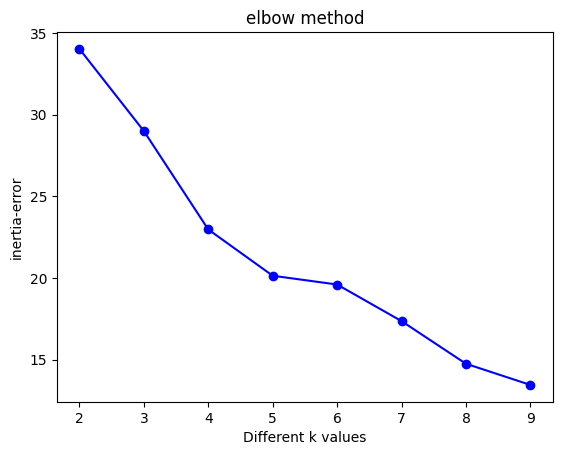

In [397]:
plt.plot(K, ssd, "bo-") #'bo-' specifies blue colour, and circles in the plot
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

The slode of inertia reduction starts to flatten after k=4, so four clusters will be used going forward

In [398]:
K_means_model = KMeans(n_clusters= 4, random_state = 42)
clusters = K_means_model.fit_predict(df_scaled)

### Silhouette score

In [399]:
from sklearn.metrics import silhouette_score
silhouette_score(df_scaled, K_means_model.labels_)

0.6418884937861603

Score of 0.64 indicates moderate separation between the clusters

In [400]:
## Visualising my cluster analysis

Can try visualising clustering in key variables, like 'Military Strength Power Index', 'defense spending budget value',  'Navy Fleet Strengths value', 'Aircraft Strength value'

In [401]:
df_scaled['Cluster'] = clusters
df_key_variables = df_scaled[['Military Strength Power Index', 'defense spending budget value',  'Navy Fleet Strengths value', 'Aircraft Strength value','Cluster']]

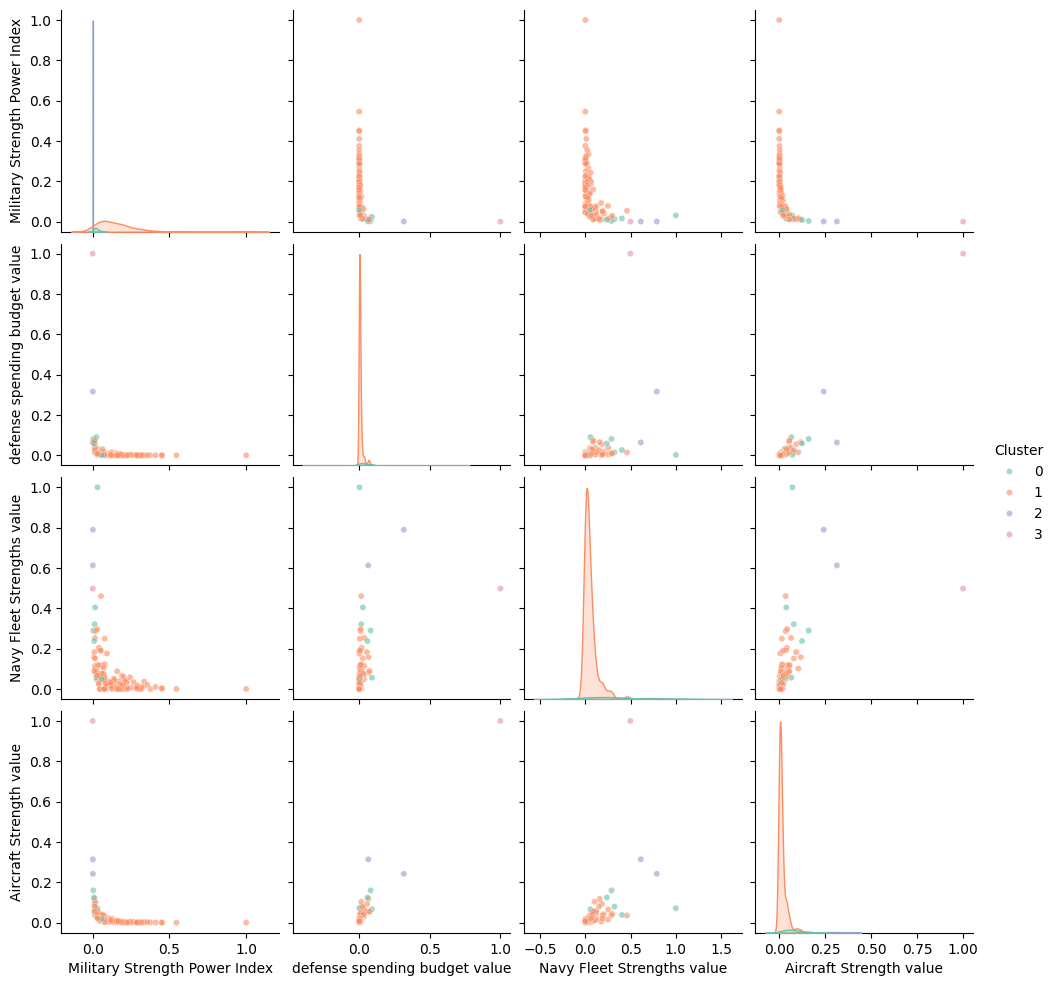

In [402]:
sns.pairplot(df_key_variables, vars=['Military Strength Power Index', 'defense spending budget value', 
                       'Navy Fleet Strengths value', 'Aircraft Strength value'], hue='Cluster', palette='Set2', plot_kws={'alpha': 0.6, 's':20})

How else to visualise my clusters? Too many features to examine at once. Could use dimensionality reduction by PCA to look at this instead (although, reduces interpretability of the PCs themselves)

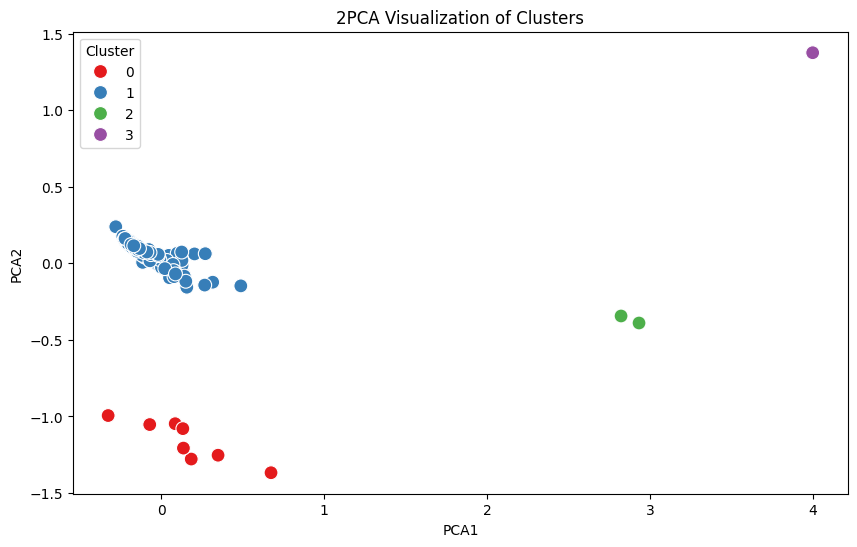

In [403]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Add PCA results to the dataframe for visualization
df_scaled['PCA1'] = pca_result[:, 0]
df_scaled['PCA2'] = pca_result[:, 1]
df_scaled['Cluster'] = K_means_model.labels_

# Plotting the PCA result with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_scaled, palette='Set1', s=100)
plt.title('2PCA Visualization of Clusters')
plt.show()

Cluster size is highly uneven, USA biggest outlier, then Russia and China, then rest of world broadly split into the two remaining clusters (0 and 1). Separation between 0 and 1 less clear cut in the individual variables, look very clean in the PCA though.